# Introduction to the Course

In these series of workshops, we will be developing our understanding of machine learning techniques so that we can ultimately apply them to our research problems in the conus exogenomics group.

We will begin the course by becoming familiar with the popular machine learning library: __scikit-learn__.

![alt-text](http://www.scipy-lectures.org/_images/scikit-learn-logo.png)

## Installation

These tutorials will require recent installations of:
* numpy
* scipy
* matplotlib
* scikit-learn
* ipython with ipython notebook (Jupyter Notebook)

To easily install these all at once, I suggest installing [Anaconda](https://www.continuum.io/what-is-anaconda)

## Downloading Course Materials

To download the course materials, I highly recommend installing __git__, and creating a __GitHub__ account if you haven't already. 

To install git, simply run the following command in the terminal:

```
sudo apt-get install git
```

Once git is installed, you can clone the material in this workshop by running the following command:

```
git clone https://github.com/INASIC/conus-exogenomics/tree/master/machine_learning/workshops/sklearn/tutorials
```

## Table of Contents

1. Linear Regression
 * Loading the dataset
 * Preparing the dataset
 * Fitting the model
 * Evaluating the model
2. Introduction to Classification
 * The Iris dataset
 * Class label encoding
 * Scikit-learn's in-build datasets
 * Test/train splits
 * Logistic Regression
 * K-Nearest Neighbors
 * Exercises

# 1. Linear Regression

We will begin the workshop by looking at the simple linear regression algorithm to fit a straight line onto a dataset. 

## The Investigation

The dataset we will look at is collected from the following source: 

R.J. Gladstone (1905). "*A Study of the Relations of the Brain to to the Size of the Head*", Biometrika, Vol. 4, pp105-123

Here, we will investigate the relationship between brain weight (in grams) to head size (cubic cm) for 237 adults classified by gender and age group.

## Import Dependencies

In [30]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# suppress warning messages
import warnings; warnings.simplefilter('ignore')

## Loading the Dataset

Here, we use pandas to load the dataset into a pandas __dataframe__.

We then print out the first few lines of this dataset using the __.tail()__ command.

In [31]:
df = pd.read_csv('./data/dataset_brain.txt', 
                 encoding='utf-8', 
                 comment='#',
                 sep='\s+')
df.tail()

,gender,age-group,head-size,brain-weight
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170
236,2,2,3391,1120


## Visualize the Dataset

Here, we use matplotlib to visualize the dataset.

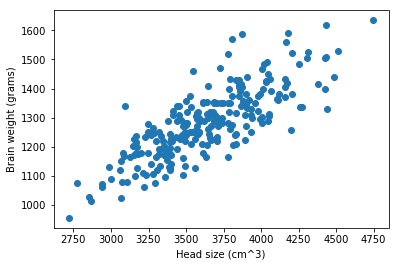

In [32]:
plt.scatter(df['head-size'], df['brain-weight'])
plt.xlabel('Head size (cm^3)')
plt.ylabel('Brain weight (grams)');

## Preparing the Dataset

Before we can begin applying linear regression on our data, we first need to prepare the dataset using pandas.

In [33]:
y = df['brain-weight'].values
y.shape


X = df['head-size'].values
X = X[:, np.newaxis]
X.shape

(237, 1)

## Seperating the Data

Here, we split our dataset into three sections: 
1. Training data
    * What we train our algorithm on
2. Testing data
    * What we use to evaluate the performance of our algorithm, after training
    
We then visualize this split dataset to get a better intuition into the spread of our data.

In [34]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=123)

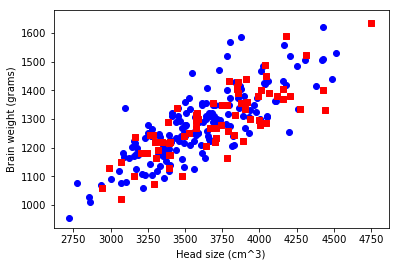

In [35]:
plt.scatter(X_train, y_train, c='blue', marker='o')
plt.scatter(X_test, y_test, c='red', marker='s')
plt.xlabel('Head size (cm^3)')
plt.ylabel('Brain weight (grams)');

## Training our Linear Regression Model

In [36]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

## Evaluating the Performance of our Model

In [37]:
sum_of_squares = ((y_test - y_pred) ** 2).sum()
res_sum_of_squares = ((y_test - y_test.mean()) ** 2).sum()
r2_score = 1 - (sum_of_squares / res_sum_of_squares)
print('R2 score: %.3f' % r2_score)

R2 score: 0.635


In [38]:
print('R2 score: %.3f' % lr.score(X_test, y_test))

R2 score: 0.635


In [39]:
lr.coef_

array([ 0.271117])

In [40]:
lr.intercept_

302.03033196088086

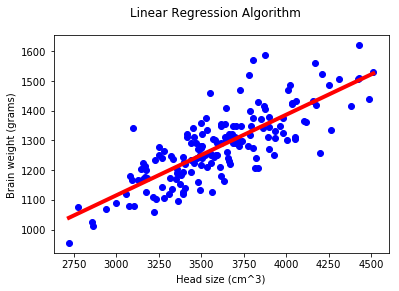

In [41]:
min_pred = X_train.min() * lr.coef_ + lr.intercept_
max_pred = X_train.max() * lr.coef_ + lr.intercept_

plt.scatter(X_train, y_train, c='blue', marker='o')
plt.plot([X_train.min(), X_train.max()],
         [min_pred, max_pred],
         color='red',
         linewidth=4)
plt.suptitle('Linear Regression Algorithm')
plt.xlabel('Head size (cm^3)')
plt.ylabel('Brain weight (grams)')

## Exercises

Now that we have discussed one example of linear regression, we will now work together to analyze datasets of our own choosing.

Go to this link, and [download](http://archive.ics.uci.edu/ml/datasets.html?area=&att=&format=&numAtt=&numIns=&sort=attup&task=reg&type=&view=table) a dataset of your choosing.

## Your Assignment

Following the tutorial we have just discussed, you are to:
1. __Train__ a __linear regression model__ on your dataset using scikit-learn. 
2. __Upload__ your results to the conus-exogenomics [repository](https://github.com/INASIC/conus-exogenomics/tree/master/machine_learning/workshops/sklearn/tutorials/submissions/linear_regression) 
3. __Discuss__ your results with the group.

# Uploading to GitHub



## Next Week

[Introduction to Classification](https://github.com/INASIC/conus-exogenomics/tree/master/machine_learning/workshops/sklearn/tutorials/classification)